In [2]:
import numpy as np
import matplotlib.pyplot as plt
import functools
from tqdm import tqdm
import poles
import material
import multilayer


In [3]:
# Parameters for the coated sphere
n_func_core = material.get_n_silica
n_func_coating = material.get_n_gold_drude_lorentz
n_func_background = material.get_n_water()
multipole_order = 1

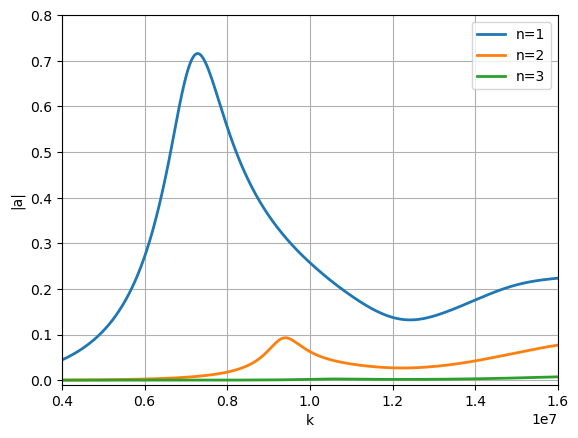

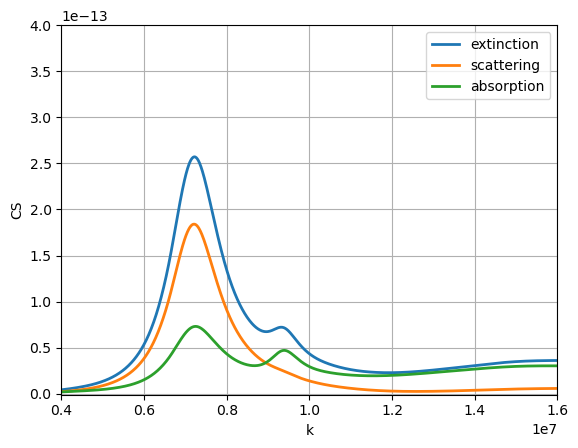

In [4]:
# Find the first pole
lam_min = 400e-9
lam_max = 1400e-9
k_min = 2 * np.pi / lam_max
k_max = 2 * np.pi / lam_min
k_min = 0.4e7
k_max = 1.6e7
k_array =np.linspace(k_min, k_max, 10**3)
data = []
data2=[]
data3=[]
data_cse = []
data_css = []
data_csa = []
n_dat=  []

r_core = 60e-9
r_shell = 10e-9

r_list = [r_core, r_core+r_shell]
n_func_list = [n_func_core, n_func_coating, n_func_background]

for k in k_array:
    a = multilayer.get_a(k, r_list, n_func_list, 1)
    data.append(np.abs(a))
    a = multilayer.get_a(k, r_list, n_func_list, 2)
    data2.append(np.abs(a))
    a = multilayer.get_a(k, r_list, n_func_list, 3)
    data3.append(np.abs(a))
    cse = multilayer.get_extinction_cross_section(k, r_list, n_func_list)
    data_cse.append(np.abs(cse))
    css = multilayer.get_scattering_cross_section(k, r_list, n_func_list)
    data_css.append(np.abs(css))
    csa = cse - css
    data_csa.append(csa)

fig, ax = plt.subplots()
ax.plot(k_array, data, lw=2, label="n=1")
ax.plot(k_array, data2, lw=2, label="n=2")
ax.plot(k_array, data3, lw=2, label="n=3")
ax.set_xlim(k_min, k_max)
ax.set_ylim(-0.01, 0.8)
ax.set_xlabel("k")
ax.set_ylabel("|a|")
ax.legend()
ax.grid()
# ax.set_ylim(0.9,1.1)
plt.savefig('multipole.svg', dpi=300, bbox_inches='tight')


fig, ax = plt.subplots()
ax.plot(k_array, data_cse,lw=2,label="extinction")
ax.plot(k_array, data_css,lw=2,label="scattering")
ax.plot(k_array, data_csa,lw=2,label="absorption")
ax.set_xlabel("k")
ax.set_ylabel("CS")
ax.set_xlim(k_min, k_max)
ax.set_ylim(-0.01e-13, 4e-13)
ax.legend()
ax.grid()
plt.savefig('cs.svg', dpi=300, bbox_inches='tight')


In [5]:
# Get the pole from a!
imag_k_min = -1e7
imag_k_max = 0
num_reals = 1 * 10**3
num_imags = 1 * 10**3

k_reals = np.linspace(k_min, k_max, num_reals)
k_imags = np.linspace(imag_k_min, imag_k_max, num_imags)
R, I = np.meshgrid(k_reals, k_imags)
k_array_comp = R + 1j * I
data_z = np.zeros((num_reals, num_imags))


for i in tqdm(range(num_reals)):
    for j in range(num_imags):
        k = k_array_comp[i, j]
        data_z[i, j] = np.abs(
            multilayer.get_a(k, r_list, n_func_list, 1)
        )


100%|██████████| 1000/1000 [01:34<00:00, 10.60it/s]


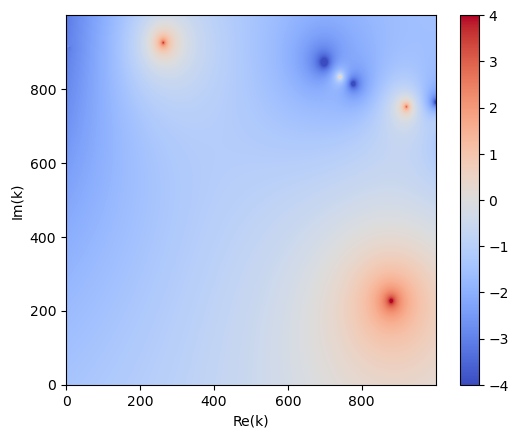

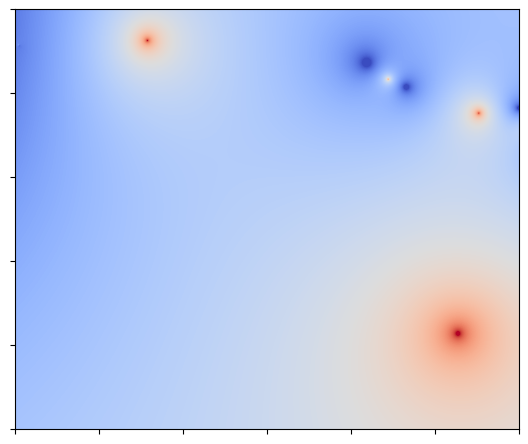

In [6]:
# 2D Plot
fig, ax = plt.subplots()
im = ax.imshow(np.log(data_z), origin="lower", vmin=-4, vmax=4, cmap="coolwarm")
cbar = fig.colorbar(im, ax=ax)
ax.set_xlabel("Re(k)")
ax.set_ylabel("Im(k)")


fig, ax = plt.subplots(figsize=(6.5,6.5))
im = ax.imshow(
    np.log(data_z),
    origin="lower",
    extent=(k_min, k_max, imag_k_min, imag_k_max),
    cmap="coolwarm",
    vmax=4,
    vmin=-4
)
# cbar = fig.colorbar(im, ax=ax)
# ax.set_xlabel("Re(k)")
# ax.set_ylabel("Im(k)")
plt.tick_params(labelbottom=False, labelleft=False)

plt.savefig('polezero.svg', dpi=300, bbox_inches='tight')


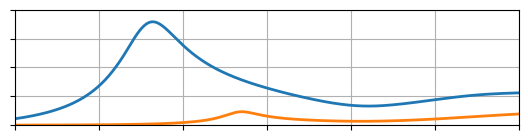

In [21]:
fig, ax = plt.subplots(figsize=(6.5,1.5))
ax.plot(k_array, data, lw=2, label="n=1")
ax.plot(k_array, data2, lw=2, label="n=2")
# ax.plot(k_array, data3, lw=2, label="n=3")
ax.set_xlim(k_min, k_max)
ax.set_ylim(0, 0.8)
# ax.set_yscale("log")
# ax.set_xlabel("k")
# ax.set_ylabel("|a|")
# ax.legend()
ax.grid()
plt.tick_params(labelbottom=False, labelleft=False)
plt.savefig('mini.svg', dpi=300, bbox_inches='tight')
